In [1]:
import pandas as pd
import matplotlib.pyplot as plt

cars_csv_data = pd.read_csv('dataSets/OLX_cars_dataset00.csv')

# Display the first few rows of the loaded data
cars_csv_data.head()

,Ad ID,Car Name,Make,Model,Year,KM's driven,Price,Fuel,Registration city,Car documents,Assembly,Transmission,Condition,Seller Location,Description,Car Features,Images URL's,Car Profile
0,1079071571,fresh import Passo 2021model,Toyota,Passo,2021,54000,4190000,Petrol,Unregistered,Original,Imported,Automatic,Used,"Airline Avenue, Islamabad","it's 2021 model fresh import, perfect engine s...","ABS, Air Bags, AM/FM Radio, CD Player, Cassett...",['https://images.olx.com.pk/thumbnails/4039460...,https://www.olx.com.pk/item/fresh-import-passo...
1,1080125520,Suzuki ravi,Suzuki,Ravi,2018,95000,1300000,Petrol,Karachi,Original,Local,Manual,Used,"Kahuta, Rawalpindi",Suzuki ravi 2018 col,AM/FM Radio,['https://images.olx.com.pk/thumbnails/4102504...,https://www.olx.com.pk/item/suzuki-ravi-iid-10...
2,1080748789,Suzuki bolan 2015 contact 03112271054,Suzuki,Bolan,2015,50000,800000,Petrol,Karachi,Original,Local,Manual,Used,"Lyari Expressway, Karachi",Suzuki bolan model 2015 reg 2022 ghadi me koi ...,Rear speakers,['https://images.olx.com.pk/thumbnails/4139520...,https://www.olx.com.pk/item/suzuki-bolan-2015-...
3,1076081635,Diahatsu Move 2013,Daihatsu,Move,2013,94000,2155000,Petrol,Lahore,Original,Imported,Automatic,Used,"New Amir Town, Lahore",Move Push start \nHome Used car. \nModel 2013....,"ABS, Air Bags, Air Conditioning, Alloy Rims, A...",['https://images.olx.com.pk/thumbnails/3865337...,https://www.olx.com.pk/item/diahatsu-move-2013...
4,1080812928,Suzuki Swift DLX 2011 miner tuchap,Suzuki,Swift,2011,126544,1440000,Petrol,Karachi,Original,Local,Manual,Used,"Shadman 2, Karachi",Suzuki Swift DLX\nAbS Break 100%\nengine 100%\...,"ABS, Air Conditioning, Alloy Rims, AM/FM Radio...",['https://images.olx.com.pk/thumbnails/4143509...,https://www.olx.com.pk/item/suzuki-swift-dlx-2...


In [33]:
x = cars_csv_data.iloc[:, 4].values
x[0:5]

array([2021, 2018, 2015, 2013, 2011])

In [49]:
import numpy as np
x = np.expand_dims(x, axis=1) # Transforming the array into a 2D
x

array([[2021],
       [2018],
       [2015],
       ...,
       [2001],
       [2009],
       [2016]])

In [50]:
y = cars_csv_data.iloc[:, 6].values
y

array([4190000, 1300000,  800000, ..., 1100000,  970000, 2050000])

In [51]:
y = np.expand_dims(y, axis=1) # Transforming the array into a 2D
y

array([[4190000],
       [1300000],
       [ 800000],
       ...,
       [1100000],
       [ 970000],
       [2050000]])

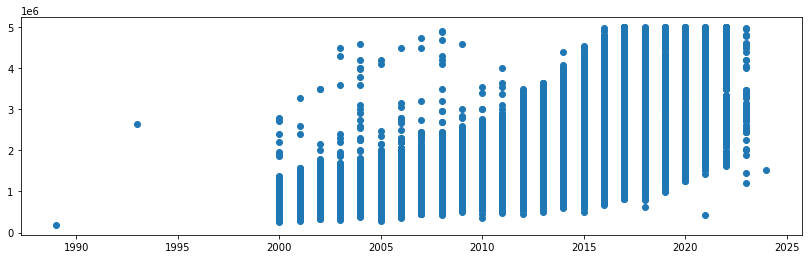

In [52]:
plt.figure(figsize=(14, 4))
plt.scatter(x, y)
plt.show()

## Split into training and testing data

In [53]:
from sklearn.model_selection import train_test_split as tts

In [54]:
x_train, x_test, y_train, y_test = tts(x, y, test_size=0.2, random_state=0)

## Training the model

In [55]:
from sklearn.linear_model import LinearRegression 

In [56]:

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

## Predicting data using the trained model

In [57]:
model.predict([[2025], [2030], [2035]])

array([[3718947.89349303],
       [4380816.58984932],
       [5042685.28620562]])

## Evaluating the prediction precision

In [59]:
y_pred = model.predict(x_test)
y_pred

array([[1600968.06515285],
       [2792331.71859419],
       [2130463.0222379 ],
       ...,
       [1600968.06515285],
       [1865715.54369539],
       [ 939099.36879656]])

In [60]:
difference =  y_pred - y_test
difference

array([[  450968.06515285],
       [  692331.71859419],
       [-1344536.9777621 ],
       ...,
       [ -599031.93484715],
       [ -829284.45630461],
       [  309099.36879656]])

## Visual predicted data with line of best fit

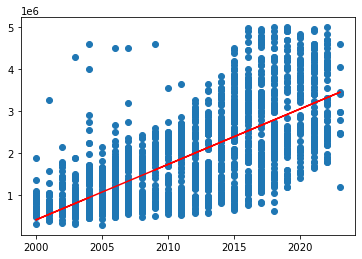

In [64]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='red')
plt.show()

## Calculating the accuracy of the model

In [65]:
from sklearn.metrics import r2_score as accuracy

In [66]:
accuracy(y_test, y_pred)

0.42584180469252886

### The accuracy of this mode is 43%